# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">هیستوگرام تصویر</div>

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مرور هیستوگرام و مفهوم آن</div>

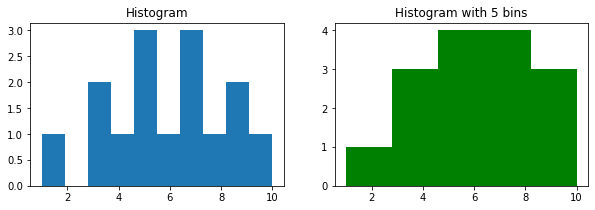

In [44]:
import matplotlib.pyplot as plt
import numpy as np

list_of_numbers = np.array([5,4,5,10,3,5,6,9,7,8,7,9,1,3,7])

plt.figure(figsize=[10,3])
plt.subplot(121);plt.hist(list_of_numbers);plt.title("Histogram");
plt.subplot(122);plt.hist(list_of_numbers, 5, color='green');plt.title("Histogram with 5 bins");

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> هیستوگرام یک تصویر سطح-خاکستری با matplotlib</div>

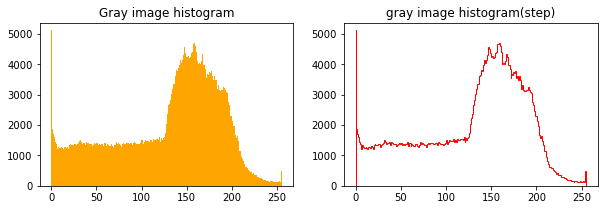

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread('images/input.jpg',0)

plt.figure(figsize=[10,3])
# ravel() flatens an image array 
plt.subplot(121);plt.hist(image.ravel(), 256, color='orange');plt.title("Gray image histogram");
plt.subplot(122);plt.hist(image.ravel(), 256, histtype='step', color = 'red');plt.title("gray image histogram(step)");

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> هیستوگرام یک تصویر سطح-خاکستری با OpenCV</div>

``cv2.calcHist(images, channels, mask, bins, ranges)``

where:
1. **images** - is the image we want to calculate the histogram of wrapped as a list, so if our image is in variable image we will pass [image],
2. **channels** - is the the index of the channels to consider wrapped as a list ([0] for gray-scale images as there's only one channel and [0], [1] or [2] for color images if we want to consider the channel green, blue or red respectively),
3. **mask** - is a mask to be applied on the image if we want to consider only a specific region (we're gonna ignore this in this post),
4. **bins** - is a list containing the number of bins to use for each channel,
5. **ranges** - is the range of the possible pixel values which is [0, 256] in case of RGB color space (where 256 is not inclusive).

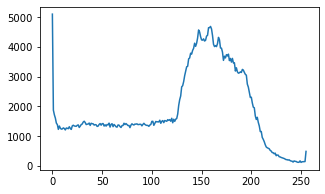

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread('images/input.jpg',0)
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.figure(figsize=[5,3])
plt.plot(histogram)

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تاثیر نور تصویر روی هیستوگرام تصویر</div>

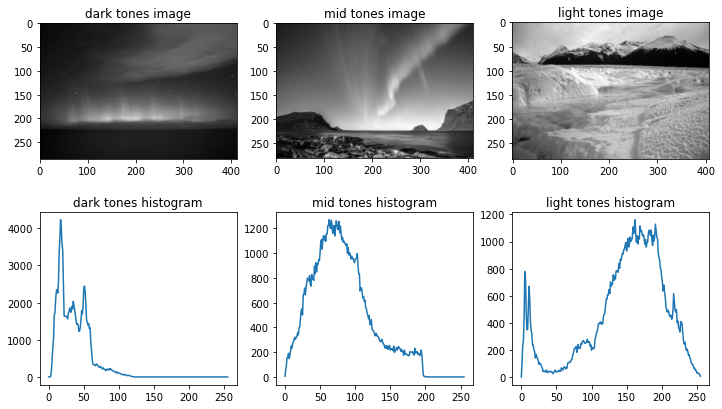

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# read images
dark_tones = cv2.imread('images/dark.png')
mid_tones = cv2.imread('images/mid.png')
light_tones = cv2.imread('images/light.png')

#convert to gray
dark_tones_gray = cv2.cvtColor(dark_tones, cv2.COLOR_BGR2GRAY)
mid_tones_gray = cv2.cvtColor(mid_tones, cv2.COLOR_BGR2GRAY)
light_tones_gray = cv2.cvtColor(light_tones, cv2.COLOR_BGR2GRAY)

#calculate histograms
dark_tones_histogram = cv2.calcHist([dark_tones_gray], [0], None, [256], [0, 256])
mid_tones_histogram = cv2.calcHist([mid_tones_gray], [0], None, [256], [0, 256])
light_tones_histogram = cv2.calcHist([light_tones_gray], [0], None, [256], [0, 256])

#plot
plt.figure(figsize=[12,7])
plt.subplot(231);plt.imshow(dark_tones_gray, cmap='gray');plt.title("dark tones image");
plt.subplot(232);plt.imshow(mid_tones_gray, cmap='gray');plt.title("mid tones image");
plt.subplot(233);plt.imshow(light_tones_gray, cmap='gray');plt.title("light tones image");
plt.subplot(234);plt.plot(dark_tones_histogram);plt.title("dark tones histogram");
plt.subplot(235);plt.plot(mid_tones_histogram);plt.title("mid tones histogram");
plt.subplot(236);plt.plot(light_tones_histogram);plt.title("light tones histogram");

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی هیستوگرام هر کانال رنگی</div>

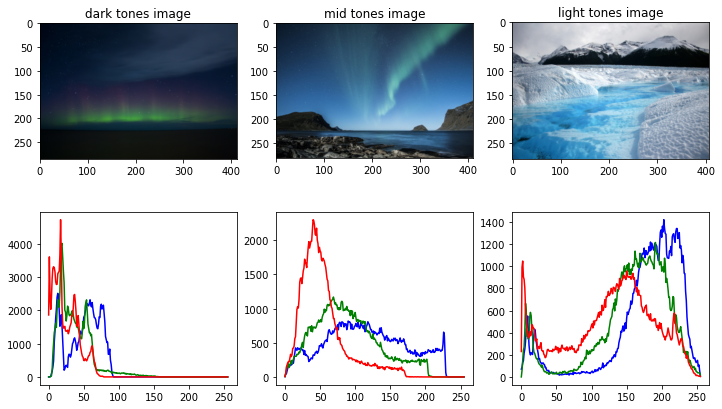

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# read images
dark_tones = cv2.imread('images/dark.png')
mid_tones = cv2.imread('images/mid.png')
light_tones = cv2.imread('images/light.png')

#plot imagea
plt.figure(figsize=[12,7])
plt.subplot(231);plt.imshow(dark_tones[...,::-1]);plt.title("dark tones image");
plt.subplot(232);plt.imshow(mid_tones[...,::-1]);plt.title("mid tones image");
plt.subplot(233);plt.imshow(light_tones[...,::-1]);plt.title("light tones image");

color = ('b', 'g', 'r')
#dark tones histogram
plt.subplot(234);
for i, col in enumerate(color):
    histogram = cv2.calcHist([dark_tones], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)
    
#mid tones histogram
plt.subplot(235);
for i, col in enumerate(color):
    histogram = cv2.calcHist([mid_tones], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)
    
#light tones histogram
plt.subplot(236);
for i, col in enumerate(color):
    histogram = cv2.calcHist([light_tones], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

https://docs.opencv.org/4.6.0/d1/db7/tutorial_py_histogram_begins.html

Thanks to: https://medium.com/@rndayala/image-histograms-in-opencv-40ee5969a3b7